In [157]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

from utils import *

In [158]:
train_data, test_data = load_mnist()

In [159]:
missingness = Missingness()
imputer = KNNImageImputer()

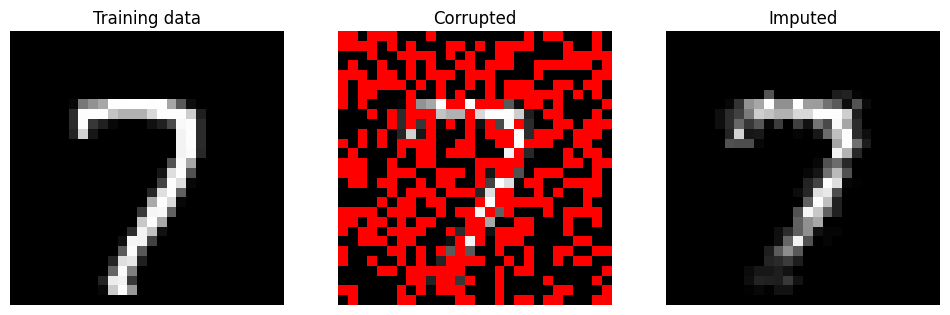

In [160]:
idx = torch.randint(len(train_data), size=(1,)).item()

img, label = train_data[idx]
corrupted, mask = missingness.mcar(img, missing_rate=0.5)
imputed = imputer.impute(corrupted)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

cmap = plt.cm.grey.copy()
cmap.set_bad('red')

ax[0].imshow(img.squeeze(), cmap=cmap)
ax[0].set_title("Training data")
ax[0].axis('off')

ax[1].imshow(corrupted.squeeze(), cmap=cmap)
ax[1].set_title("Corrupted")
ax[1].axis('off')

ax[2].imshow(imputed.squeeze(), cmap=cmap)
ax[2].set_title("Imputed")
ax[2].axis('off')

plt.show()

In [165]:
missingness = Missingness()
knn_imputer = KNNImageImputer(k=5)
mean_imputer = MeanImageImputer()

device = get_device()

missingness_percentages = np.arange(0, 100, 5)

In [166]:
tensor_x, labels, indices = get_raw_data('mnist', device=device)